In [1]:
from astropy.table import Table, vstack, Column
import numpy as np
from numpy.random import random
import csv
import os
import matplotlib.pyplot as plt

Precomputed files found. Loading existing files...
Files loaded


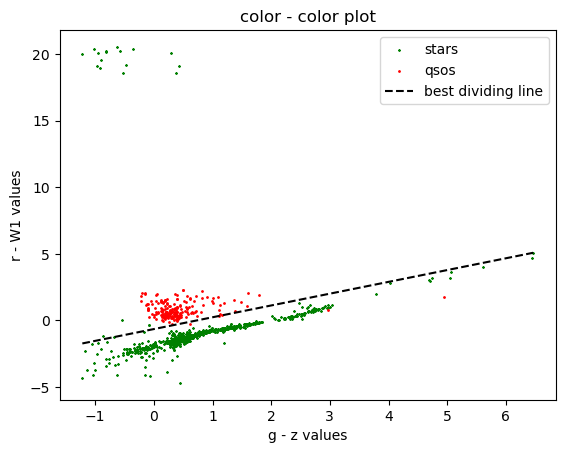

The best dividing line was determined to be y = 0.8862876254180598 * x + -0.652173913043478
Anything above this line is classified as a QSO, anything below is a star. Note the outliers on top left which comprise 1.7% 
of stars in the dataset

This method misclassified 20 stars as qsos and misclassified 3 qsos as stars
This line correctly divides 98.13 % of the objects


randomly selected star is classified as star
randomly selected QSO is classified as QSO


In [4]:
#python task #1 add grzW1W2 columns to dataset

#TJ This script takes a LONG TIME! so this checks if files already exists first, only reruns if it fails to find files already in directory
#TJ define filenames to check if they already exist in directory
stars_filename = "Class18_stars.fits"
qsos_filename = "Class18_qsos.fits"
wrong_star_filename = "Class18_wrg_star.fits"
wrong_qso_filename = "Class18_wrg_qso.fits"
SDSS_stars_filename = "Class18_SDSS_stars.txt"
SDSS_qsos_filename = "Class18_SDSS_qsos.txt"

#TJ check if the output files already exist
if all(os.path.exists(f) for f in [stars_filename, qsos_filename, wrong_star_filename, wrong_qso_filename, SDSS_stars_filename, SDSS_qsos_filename]):
    print("Precomputed files found. Loading existing files...")
    stars = Table.read(stars_filename, format="fits")
    qsos = Table.read(qsos_filename, format="fits")
    wrong_star = Table.read(wrong_star_filename, format="fits")
    wrong_qso = Table.read(wrong_qso_filename, format="fits")
    with open('Class18_SDSS_stars.txt', "r") as file:
        reader = csv.reader(file, delimiter=",")
        SDSS_stars_array = [row for row in reader]
    with open('Class18_SDSS_qsos.txt', "r") as file:
        reader = csv.reader(file, delimiter=",")
        SDSS_qsos_array = [row for row in reader]
    print('Files loaded')
else:
    print("No precomputed files found. Running full processing, this will take a while... check back in an hour :)")
    
    
    #TJ assign file paths
    star_file = '/d/scratch/ASTR5160/week10/stars-ra180-dec30-rad3.fits' 
    qso_file = '/d/scratch/ASTR5160/week10/qsos-ra180-dec30-rad3.fits'
    sweep_directory = '/d/scratch/ASTR5160/data/legacysurvey/dr9/south/sweep/9.0/' #TJ assign sweep file directories
    sweep_files = [sweep_directory + 'sweep-170p025-180p030.fits', sweep_directory + 'sweep-180p025-190p030.fits', 
                   sweep_directory + 'sweep-170p030-180p035.fits', sweep_directory + 'sweep-180p030-190p035.fits'] #TJ assign needed sweep file paths
    
    #TJ read in tables
    stars = Table.read(star_file) 
    qsos = Table.read(qso_file)
    sweep_data = Table.read(sweep_files[0]) #TJ initialize table of all four sweep files.
    for file in sweep_files[1:]:
        new_table = Table.read(file)
        sweep_data = vstack([sweep_data, new_table]) #TJ add new sweep files as additional rows at the end of the table
    
    new_star_values = [0] * len(stars) #TJ initialize values
    new_qso_values = [0] * len(qsos)
    #TJ initialize columns
    
    ra_star_col = Column(data=new_star_values, name="sweep_ra", dtype="float64")
    dec_star_col = Column(data=new_star_values, name="sweep_dec", dtype="float64")
    g_star_col = Column(data=new_star_values, name="g_flux", dtype="float64")
    r_star_col = Column(data=new_star_values, name="r_flux", dtype="float64")
    z_star_col = Column(data=new_star_values, name="z_flux", dtype="float64")
    W1_star_col = Column(data=new_star_values, name="W1_flux", dtype="float64")
    W2_star_col = Column(data=new_star_values, name="W2_flux", dtype="float64")
    MW_G_star_col = Column(data=new_star_values, name="MW_TRANSMISSION_G", dtype="float64")
    MW_R_star_col = Column(data=new_star_values, name="MW_TRANSMISSION_R", dtype="float64")
    MW_Z_star_col = Column(data=new_star_values, name="MW_TRANSMISSION_Z", dtype="float64")
    MW_W1_star_col = Column(data=new_star_values, name="MW_TRANSMISSION_W1", dtype="float64")
    MW_W2_star_col = Column(data=new_star_values, name="MW_TRANSMISSION_W2", dtype="float64")
    g_mag_star_col = Column(data=new_star_values, name="g_mag", dtype="float64")
    r_mag_star_col = Column(data=new_star_values, name="r_mag", dtype="float64")
    z_mag_star_col = Column(data=new_star_values, name="z_mag", dtype="float64")
    W1_mag_star_col = Column(data=new_star_values, name="W1_mag", dtype="float64")
    W2_mag_star_col = Column(data=new_star_values, name="W2_mag", dtype="float64")
    
    
    ra_qso_col = Column(data=new_qso_values, name="sweep_ra", dtype="float64")
    dec_qso_col = Column(data=new_qso_values, name="sweep_dec", dtype="float64")
    g_qso_col = Column(data=new_qso_values, name="g_flux", dtype="float64")
    r_qso_col = Column(data=new_qso_values, name="r_flux", dtype="float64")
    z_qso_col = Column(data=new_qso_values, name="z_flux", dtype="float64")
    W1_qso_col = Column(data=new_qso_values, name="W1_flux", dtype="float64")
    W2_qso_col = Column(data=new_qso_values, name="W2_flux", dtype="float64")
    MW_G_qso_col = Column(data=new_qso_values, name="MW_TRANSMISSION_G", dtype="float64")
    MW_R_qso_col = Column(data=new_qso_values, name="MW_TRANSMISSION_R", dtype="float64")
    MW_Z_qso_col = Column(data=new_qso_values, name="MW_TRANSMISSION_Z", dtype="float64")
    MW_W1_qso_col = Column(data=new_qso_values, name="MW_TRANSMISSION_W1", dtype="float64")
    MW_W2_qso_col = Column(data=new_qso_values, name="MW_TRANSMISSION_W2", dtype="float64")
    g_mag_qso_col = Column(data=new_qso_values, name="g_mag", dtype="float64")
    r_mag_qso_col = Column(data=new_qso_values, name="r_mag", dtype="float64")
    z_mag_qso_col = Column(data=new_qso_values, name="z_mag", dtype="float64")
    W1_mag_qso_col = Column(data=new_qso_values, name="W1_mag", dtype="float64")
    W2_mag_qso_col = Column(data=new_qso_values, name="W2_mag", dtype="float64")
    stars.add_columns([ra_star_col, dec_star_col, g_star_col, r_star_col, z_star_col, W1_star_col, W2_star_col, 
                       MW_G_star_col,MW_R_star_col, MW_Z_star_col, MW_W1_star_col, MW_W2_star_col, g_mag_star_col,
                      r_mag_star_col, z_mag_star_col, W1_mag_star_col, W2_mag_star_col]) #TJ add columns to the table, values will be set next
    qsos.add_columns([ra_qso_col, dec_qso_col, g_qso_col, r_qso_col, z_qso_col, W1_qso_col, W2_qso_col,
                     MW_G_qso_col,MW_R_qso_col, MW_Z_qso_col, MW_W1_qso_col, MW_W2_qso_col, g_mag_qso_col,
                      r_mag_qso_col, z_mag_qso_col, W1_mag_qso_col, W2_mag_qso_col])
    for star in stars:
        #TJ for every star, find the row in the sweep table that has the closest location on the sky
        sweep_index = np.argmin(np.sqrt((star["RA"]-sweep_data["RA"])**2 + (star["DEC"] - sweep_data["DEC"])**2)) #TJ find closest object in sweep file
        #TJ this used to be used to delete objects that were over 0.5 arcseconds apart
        star["sweep_ra"] = sweep_data[sweep_index]['RA'] #TJ record sweep RA and DEC values for verification later
        star["sweep_dec"] = sweep_data[sweep_index]['DEC']
        star["g_flux"] = sweep_data[sweep_index]['FLUX_G']  #TJ assign values for sweep file flux values
        star["r_flux"] = sweep_data[sweep_index]['FLUX_R']
        star["z_flux"] = sweep_data[sweep_index]['FLUX_Z']
        star["W1_flux"] = sweep_data[sweep_index]['FLUX_W1']
        star["W2_flux"] = sweep_data[sweep_index]['FLUX_W2']
        star["MW_TRANSMISSION_G"] = sweep_data[sweep_index]['MW_TRANSMISSION_G']
        star["MW_TRANSMISSION_R"] = sweep_data[sweep_index]['MW_TRANSMISSION_R']
        star["MW_TRANSMISSION_Z"] = sweep_data[sweep_index]['MW_TRANSMISSION_Z']
        star["MW_TRANSMISSION_W1"] = sweep_data[sweep_index]['MW_TRANSMISSION_W1']
        star["MW_TRANSMISSION_W2"] = sweep_data[sweep_index]['MW_TRANSMISSION_W2']
    for qso in qsos: #TJ do the same thing for the qso list
        sweep_index = np.argmin(np.sqrt((qso["RA"]-sweep_data["RA"])**2 + (qso["DEC"] - sweep_data["DEC"])**2))
        qso["sweep_ra"] = sweep_data[sweep_index]['RA']
        qso["sweep_dec"] = sweep_data[sweep_index]['DEC']
        qso["g_flux"] = sweep_data[sweep_index]['FLUX_G']
        qso["r_flux"] = sweep_data[sweep_index]['FLUX_R']
        qso["z_flux"] = sweep_data[sweep_index]['FLUX_Z']
        qso["W1_flux"] = sweep_data[sweep_index]['FLUX_W1']
        qso["W2_flux"] = sweep_data[sweep_index]['FLUX_W2']
        qso["MW_TRANSMISSION_G"] = sweep_data[sweep_index]['MW_TRANSMISSION_G']
        qso["MW_TRANSMISSION_R"] = sweep_data[sweep_index]['MW_TRANSMISSION_R']
        qso["MW_TRANSMISSION_Z"] = sweep_data[sweep_index]['MW_TRANSMISSION_Z']
        qso["MW_TRANSMISSION_W1"] = sweep_data[sweep_index]['MW_TRANSMISSION_W1']
        qso["MW_TRANSMISSION_W2"] = sweep_data[sweep_index]['MW_TRANSMISSION_W2']
    
    #python task #2 convert values and remove inaccurate objects
    
    #TJ initially I had this using the criterion that the sqrt((dRA**2 +dDEC**2)) is bigger than 0.5 arcseconds, but this pulled out a lot of
    #TJ objects that actually had calculated g_magntidues that were VERY close to the SDSS tool's values, so now I will use the difference in
    #TJ my calculated g_mag from the SDSS tool's g_mag as my criterion. I do the SDSS search using the RA and DEC from the Class18 file, but the 
    #TJ g_mag is calculated using the sweep dataset, so if the g_mag is farther than 0.25 away from the SDSS object's, it will be removed.
    open("Class18_SDSS_stars.txt", "w").close() #TJ wipe the file and start from scratch
    new_file = 'Class18_SDSS_stars.txt'
    for i, star in enumerate(stars):        
        ra, dec = star["RA"], star["DEC"]
        print(f'SDSS querying object {i+1}')
        os.system(f"python sdssDR9query.py {ra} {dec} >> {new_file}")
        
        star["g_flux"] = star["g_flux"]/star["MW_TRANSMISSION_G"] #TJ calibrate for galactic extinction
        star["r_flux"] = star["r_flux"]/star["MW_TRANSMISSION_R"]
        star["z_flux"] = star["z_flux"]/star["MW_TRANSMISSION_Z"]
        star["W1_flux"] = star["W1_flux"]/star["MW_TRANSMISSION_W1"]
        star["W2_flux"] = star["W2_flux"]/star["MW_TRANSMISSION_W2"]
        star["g_mag"] = 22.5 - 2.5*np.log10(star["g_flux"]) if star["g_flux"] > 0 else 0 #TJ convert g_flux to g_mag. If g_flux is negative, give it a zero
        star["r_mag"] = 22.5 - 2.5*np.log10(star["r_flux"]) if star["r_flux"] > 0 else 0
        star["z_mag"] = 22.5 - 2.5*np.log10(star["z_flux"]) if star["z_flux"] > 0 else 0
        star["W1_mag"] = 22.5 - 2.5*np.log10(star["W1_flux"]) if star["W1_flux"] > 0 else 0
        star["W2_mag"] = 22.5 - 2.5*np.log10(star["W2_flux"]) if star["W2_flux"] > 0 else 0
        #TJ these lines are commented out, I am using a different deletion criterion now.
        #if np.sqrt((star["RA"] - star["sweep_ra"])**2 + (star["DEC"]- star["sweep_dec"])**2) > p5_arcsec: #TJ calclulate separation.
            #maybe_wrg_obj.add_row(star) #TJ if separation is more than 0.5 arcseconds, remove from table and add to separate table
            #remove_star_rows.append(i)
        #stars.remove_rows(remove_star_rows)
    print('using SDSS navigator manually on the first couple entries, these magnitudes are off by less than 0.2, which is... close enough?')
    
    
    SDSS_stars_array = []
    with open(f"{new_file}", "r") as file:
        reader = csv.reader(file, delimiter=",")
        SDSS_stars_array = [row for row in reader]
    print(f'length of stars file : {len(stars)}')
    print(f'length of SDSS stars file : {len(SDSS_stars_array)}')
    
    max_error = 0.25 #TJ if calculated g_mag is off from SDSS tool by more than 0.25, I will delete this from the dataset
    remove_star_rows = [] #TJ initialize array of indices to remove, if I remove them in the loop the next index in the loop will be incorrect
    wrong_star = Table(names=stars.colnames, dtype=[col.dtype for col in stars.itercols()]) #TJ initialize table of incorrect objects
        
    for i, star in enumerate(stars):
        if SDSS_stars_array[i] == ['No objects have been found']: #TJ if SDSS returned no objects, try the sweep file ra, dec
            SDSS_stars_array[i] = os.system(f'python sdssDR9query.py {star["sweep_ra"]} {star["sweep_dec"]}')
            if SDSS_stars_array[i] == ['No objects have been found']:
                remove_star_rows.append(i) #TJ if no SDSS object is found, just delete the object from stars table
                continue
        else:
            g_mag_diff = abs(star['g_mag'] - float(SDSS_stars_array[i][3]))
        if g_mag_diff > max_error:
            remove_star_rows.append(i)
            wrong_star.add_row(star)
    print(f'number of stars to remove : {len(remove_star_rows)}')
    stars.remove_rows(remove_star_rows)
    
    
    
    
    
    #TJ repeat above procedure for qsos
    new_file = 'Class18_SDSS_qsos.txt'
    for i, qso in enumerate(qsos):
        ra, dec = qso["RA"], qso["DEC"]
        print(f'SDSS querying object {i+1}')
        os.system(f"python sdssDR9query.py {ra} {dec} >> {new_file}")
        qso["g_flux"] = qso["g_flux"]/qso["MW_TRANSMISSION_G"]
        qso["r_flux"] = qso["r_flux"]/qso["MW_TRANSMISSION_R"]
        qso["z_flux"] = qso["z_flux"]/qso["MW_TRANSMISSION_Z"]
        qso["W1_flux"] = qso["W1_flux"]/qso["MW_TRANSMISSION_W1"]
        qso["W2_flux"] = qso["W2_flux"]/qso["MW_TRANSMISSION_W2"]
        qso["g_mag"] = 22.5 - 2.5*np.log10(qso["g_flux"]) if qso["g_flux"] > 0 else 0
        qso["r_mag"] = 22.5 - 2.5*np.log10(qso["r_flux"]) if qso["r_flux"] > 0 else 0
        qso["z_mag"] = 22.5 - 2.5*np.log10(qso["z_flux"]) if qso["z_flux"] > 0 else 0
        qso["W1_mag"] = 22.5 - 2.5*np.log10(qso["W1_flux"]) if qso["W1_flux"] > 0 else 0
        qso["W2_mag"] = 22.5 - 2.5*np.log10(qso["W2_flux"]) if qso["W2_flux"] > 0 else 0
        #TJ lines removed for same reason as above
        #if np.sqrt((qso["RA"] - qso["sweep_ra"])**2 + (qso["DEC"]- qso["sweep_dec"])**2) > p5_arcsec:        
            #maybe_wrg_obj.add_row(qso)
            #remove_qso_rows.append(i)
    #qsos.remove_rows(remove_qso_rows)
    
    
    SDSS_qsos_array = []
    with open(f"{new_file}", "r") as file:
        reader = csv.reader(file, delimiter=",")
        SDSS_qsos_array = [row for row in reader]
    print(f'length of qsos file : {len(qsos)}')
    print(f'length of SDSS qsos file : {len(SDSS_qsos_array)}')
    
    remove_qso_rows = [] #TJ initialize array of indices to remove, if I remove them in the loop the next index in the loop will be incorrect
    wrong_qso = Table(names=qsos.colnames, dtype=[col.dtype for col in qsos.itercols()]) #TJ initialize table of incorrect objects
    
    
    for i, qso in enumerate(qsos):
        if SDSS_qsos_array[i] == ['No objects have been found']:
            SDSS_qsos_array[i] = os.system(f'python sdssDR9query.py {qso["sweep_ra"]} {qso["sweep_dec"]}')
            if SDSS_qsos_array[i] == ['No objects have been found']:
                remove_star_rows.append(i) #TJ if no SDSS object is found, just delete the object from qsos table
                continue
        else:
            g_mag_diff = abs(qso['g_mag'] - float(SDSS_qsos_array[i][3]))
        if g_mag_diff > max_error:
            remove_qso_rows.append(i)
            wrong_qso.add_row(qso)
    print(f'number of qsos to remove : {len(remove_qso_rows)}')
    qsos.remove_rows(remove_qso_rows)
    stars.write("Class18_stars.fits", format="fits", overwrite=True) #TJ save files to directory so I dont need to rerun the above cells if the kernal dies
    qsos.write("Class18_qsos.fits", format="fits", overwrite=True) #TJ this cell takes a VERY long time, since it will SDSS query over 1000 objects.
    wrong_star.write("Class18_wrg_star.fits", format="fits", overwrite=True)
    wrong_qso.write("Class18_wrg_qso.fits", format="fits", overwrite=True)


#python task #3 try color cuts to categorize objects

#TJ assign x, y locations on the color-color map
star_loc = [(star["g_mag"]-star["z_mag"], star["r_mag"]-star["W1_mag"]) for star in stars]
x_star = [x[0] for x in star_loc]
y_star = [x[1] for x in star_loc]
qso_loc = [(qso["g_mag"]-qso["z_mag"], qso["r_mag"]-qso["W1_mag"]) for qso in qsos]
x_qso = [x[0] for x in qso_loc]
y_qso = [x[1] for x in qso_loc]
star_loc = np.array(star_loc) #TJ convert to numpy array for better manipulation
qso_loc = np.array(qso_loc)

#TJ define a range of 300 slopes (m) and 300 intercepts (b) to test
#TJ raising the number of values from 100 to 300 correctly classifies an additional 1 object! at the cost of about 2 seconds. Worth it!
m_values = np.linspace(-5, 5, 300)
b_values = np.linspace(-3, 3, 300)

best_m, best_b = None, None #TJ initialize values as worst options so ANY result is better than this.
min_misclassified = float('inf')

# TJ brute-force search over (m, b) values
for m in m_values:
    for b in b_values:
        #TJ count misclassified stars (should be above the line but are below)
        misclassified_stars = np.sum(star_loc[:, 1] > (m * star_loc[:, 0] + b))
        
        #TJ count misclassified QSOs (should be above the line but are below)
        misclassified_qsos = np.sum(qso_loc[:, 1] < (m * qso_loc[:, 0] + b))
        
        #TJ get total misclassified points
        total_misclassified = misclassified_stars + misclassified_qsos

        #TJ update best line if fewer misclassifications are found
        if total_misclassified < min_misclassified:
            min_misclassified = total_misclassified
            min_misclassed_stars = misclassified_stars
            min_misclassed_qsos = misclassified_qsos
            best_m, best_b = m, b

#TJ generate dots to form the line that is the best decision boundary
x_vals = np.linspace(min(np.vstack((star_loc, qso_loc))[:, 0]), max(np.vstack((star_loc, qso_loc))[:, 0]), 10)
y_vals = best_m * x_vals + best_b #TJ y = mx + b



plt.scatter(x_star, y_star, marker = '*', s = 1, label = "stars", color = 'green')
plt.scatter(x_qso, y_qso, marker = 'o', s = 1, label = "qsos", color = 'red')
plt.plot(x_vals, y_vals, linestyle = "--", color = 'black', label = 'best dividing line')
plt.xlabel('g - z values')
plt.ylabel('r - W1 values')
plt.title('color - color plot')
plt.legend()
plt.show()
print(f"The best dividing line was determined to be y = {best_m} * x + {best_b}")
print("Anything above this line is classified as a QSO, anything below is a star. Note the outliers on top left which comprise 1.7% \nof stars in the dataset")
#TJ get statistics to see how good this actually works
print() #TJ gap so this looks nicer
print(f'This method misclassified {min_misclassed_stars} stars as qsos and misclassified {min_misclassed_qsos} qsos as stars')
print(f'This line correctly divides {round((1-(min_misclassified/(len(qsos)+len(stars))))*100,2)} % of the objects')


def what_is_it(object, m = 0.8862876254180598, b= -0.652173913043478):
    '''Use a dividing line with slope = m and y-intercept = b so determine if the object is a star or a QSO

    -------------

    (star["g_mag"]-star["z_mag"], star["r_mag"]-star["W1_mag"])

    Parameters
    -------------
    object :  type = astropy.table.row.Row - row with magnitude values for "g_mag", "z_mag", "r_mag", "W1_mag"
    m (optional, defaults to 0.886) :  type = float - slope of the dividing line
    b (optional, defaults to -0.6521) : type = float - y-intercept of dividing line                   
    
    Returns
    -------------
    string representing object classification
    'QSO' if object is above the dividing line
    'star' if object is below the dividing line
    '''
    gmz = object["g_mag"] - object["z_mag"]
    rmW1 = object["r_mag"]-object["W1_mag"]
    if rmW1 > (m * gmz + b):
        return 'QSO'
    elif rmW1 < (m * gmz + b):
        return 'star'
    else:
        print('something went wrong classifying this object')
        return None

#TJ try to classify a randomly selected star and QSO to see if it gets it right!
print()
print()
print(f'randomly selected star is classified as {what_is_it(stars[round((random(1)*len(stars))[0])])}')
print(f'randomly selected QSO is classified as {what_is_it(qsos[round((random(1)*len(qsos))[0])])}')